In [ ]:
! pip uninstall xlrd

Found existing installation: xlrd 1.1.0
Uninstalling xlrd-1.1.0:
  Would remove:
    /usr/local/bin/runxlrd.py
    /usr/local/lib/python3.7/dist-packages/xlrd-1.1.0.dist-info/*
    /usr/local/lib/python3.7/dist-packages/xlrd/*
Proceed (y/n)? y
  Successfully uninstalled xlrd-1.1.0


In [ ]:
! pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.5 MB/s 


In [ ]:
import seaborn as sns # Python data visualization library built on top of Matplotlib.
import pandas as pd #data analysis library into your current environment. 
import matplotlib.pyplot as plt #collection of command style functions that make matplotlib work like MATLAB.
import numpy as np
%matplotlib inline

#read training dataset and prepare it

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
#read the train dataset
df = pd.read_excel('Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Training_Data')

In [ ]:
df.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.00,0.00,0.00,0.00,very_low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.08,0.08,0.10,0.24,0.90,High,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.06,0.06,0.05,0.25,0.33,Low,NaN,NaN,STR (The degree of study time of user for rela...
3,0.10,0.10,0.15,0.65,0.30,Middle,NaN,NaN,LPR (The exam performance of user for related ...
4,0.08,0.08,0.08,0.98,0.24,Low,NaN,NaN,PEG (The exam performance of user for goal obj...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STG                     258 non-null    float64
 1   SCG                     258 non-null    float64
 2   STR                     258 non-null    float64
 3   LPR                     258 non-null    float64
 4   PEG                     258 non-null    float64
 5    UNS                    258 non-null    object 
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Attribute Information:  6 non-null      object 
dtypes: float64(7), object(2)
memory usage: 18.3+ KB


In [ ]:
df.columns

Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', ' UNS', 'Unnamed: 6', 'Unnamed: 7',
       'Attribute Information:'],
      dtype='object')

In [ ]:
#Trim Both leading and trailing space of column in pandas 
df.columns = df.columns.str.strip()

In [ ]:
df = df[['STG','SCG','STR','LPR','PEG','UNS']]

In [ ]:
df.head() #final result of dataframe after preparing label

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,very_low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [ ]:
#count number of values in UNS column
df.UNS.value_counts()

Middle      88
Low         83
High        63
very_low    24
Name: UNS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


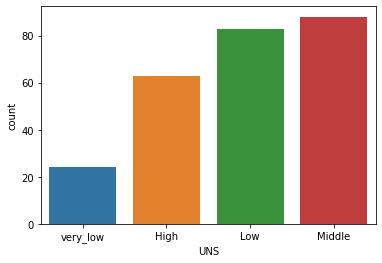

In [ ]:
#print the count plot figure of UNS column
sns.countplot(df.UNS)

In [ ]:
#label encoding of UNS label
encoding = {'very_low': 1 ,'Low': 2 ,'Middle' : 3 ,'High': 4}
df.UNS = df.UNS.map(encoding)

In [ ]:
#print head of data after performing label encoding
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,1
1,0.08,0.08,0.10,0.24,0.90,4
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2


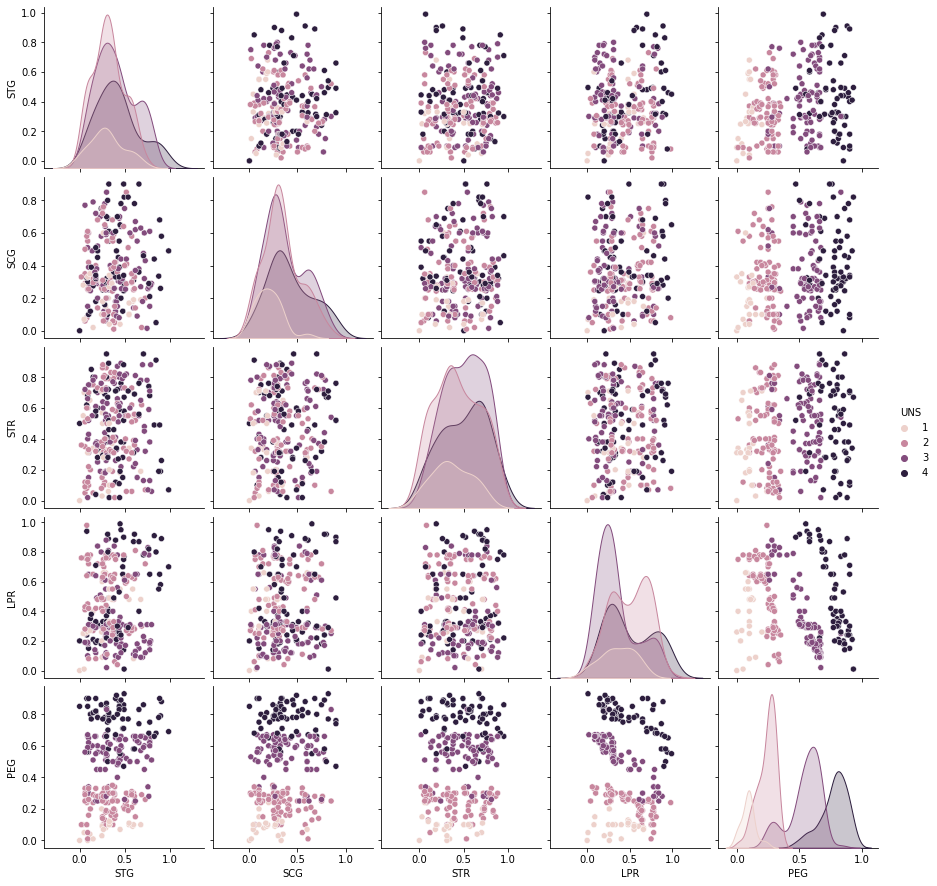

In [ ]:
#print pairplot of the data to show the pairwise relationships in a dataset.
sns.pairplot(df,hue = 'UNS',diag_kind='kde')

Text(0.5, 1.0, 'PEG Vs LPR')

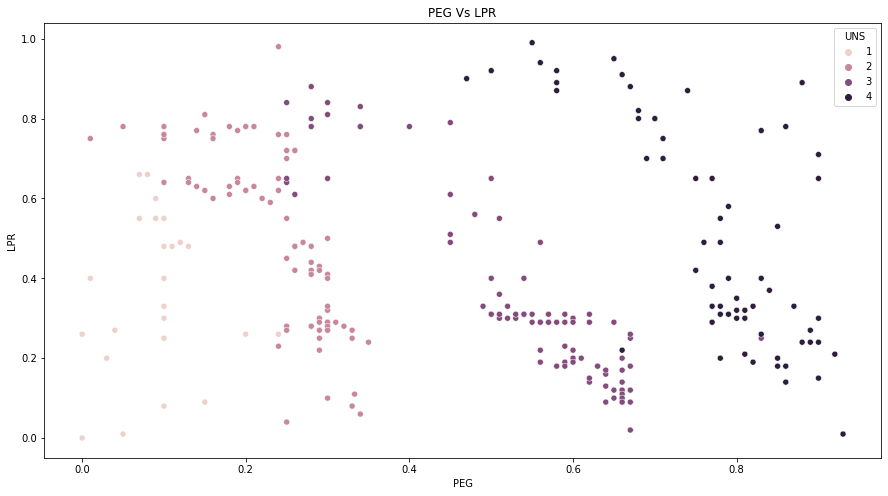

In [ ]:
#by using scatterplot to divide all classes into different colors.
plt.figure(figsize=[15,8])
sns.scatterplot(x='PEG',y='LPR',hue='UNS',data=df)
plt.title('PEG Vs LPR')

In [ ]:
x_train = df[['PEG','LPR']]
y_train = df['UNS']

#read testing dataset and prepare it

In [ ]:
#read the test dataset
df_test = pd.read_excel('/content/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls',sheet_name='Test_Data')

In [ ]:
#print the head of the test dataset
df_test.head()

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.10,0.50,0.26,0.05,Very Low,NaN,NaN,STG (The degree of study time for goal object ...
1,0.05,0.05,0.55,0.60,0.14,Low,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.08,0.18,0.63,0.60,0.85,High,NaN,NaN,STR (The degree of study time of user for rela...
3,0.20,0.20,0.68,0.67,0.85,High,NaN,NaN,LPR (The exam performance of user for related ...
4,0.22,0.22,0.90,0.30,0.90,High,NaN,NaN,PEG (The exam performance of user for goal obj...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


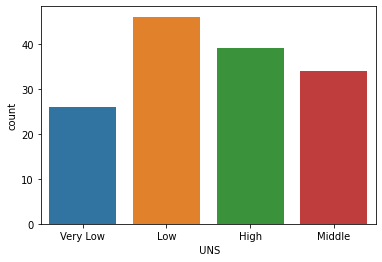

In [ ]:
#show the countplot diagran of UNS column in the test dataset
sns.countplot(df_test[' UNS'])

In [ ]:
#count UNS column in test dataset
df_test[' UNS'].value_counts()

Low         46
High        39
Middle      34
Very Low    26
Name:  UNS, dtype: int64

In [ ]:
#encoding values of UNS
encoding_test = {'Very Low': 1 ,'Low': 2 ,'Middle' : 3 ,'High': 4}

In [ ]:
df_test[' UNS'] = df_test[' UNS'].map(encoding_test)

In [ ]:
df_test[' UNS'].value_counts()

2    46
4    39
3    34
1    26
Name:  UNS, dtype: int64

In [ ]:
#split test dataset
x_test= df_test[['PEG','LPR']]
y_test = df_test[' UNS']

Text(0.5, 1.0, 'PEG Vs LPR')

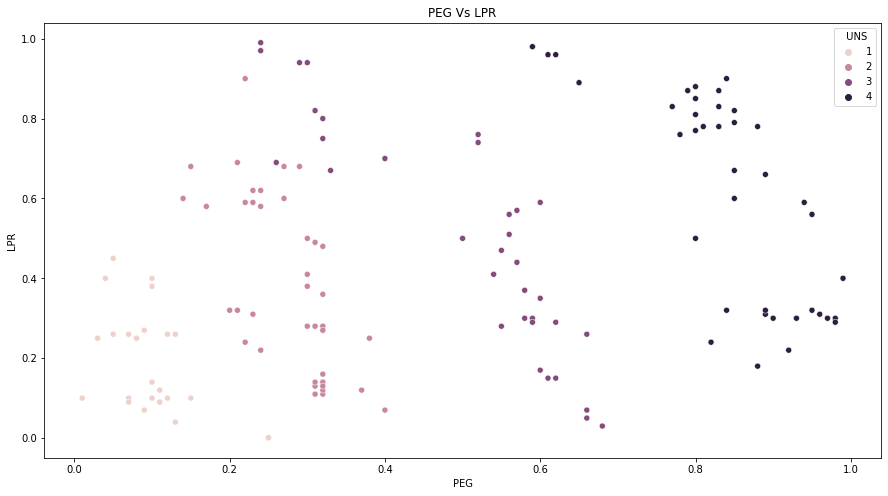

In [ ]:
#show the scatter plot of PEG&LDR and UNS column
plt.figure(figsize=[15,8])
sns.scatterplot(x='PEG',y='LPR',hue=' UNS',data=df_test)
plt.title('PEG Vs LPR')

#Implementing support vector machine classification model

In [ ]:
from sklearn.svm import SVC #import C-Support Vector Classification.
svm = SVC()
svm.fit(x_train,y_train) #to fit SVM classifier algorithm to the training dataset

SVC()

In [ ]:
#define the prediction label
y_pred = svm.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,plot_confusion_matrix #to print the classification report and confusion matrix
print(classification_report(svm.predict(x_train),y_train))

              precision    recall  f1-score   support

           1       0.79      1.00      0.88        19
           2       0.99      0.90      0.94        91
           3       0.94      0.98      0.96        85
           4       0.98      0.98      0.98        63

    accuracy                           0.95       258
   macro avg       0.93      0.97      0.94       258
weighted avg       0.96      0.95      0.95       258



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


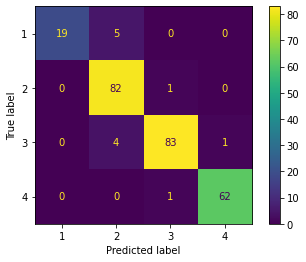

In [ ]:
#to print the confusion matrix for training dataset for SVM
plot_confusion_matrix(svm,x_train,y_train)

In [ ]:
#to print the classification report of the prediction label for SVM
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        26
           2       0.94      1.00      0.97        46
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        39

    accuracy                           0.98       145
   macro avg       0.98      0.97      0.98       145
weighted avg       0.98      0.98      0.98       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


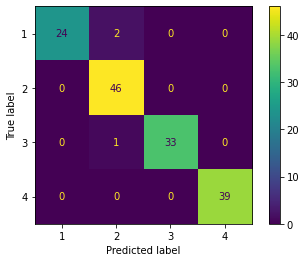

In [ ]:
#to print the confusion matrix for testing dataset for SVM
plot_confusion_matrix(svm,x_test,y_test)

In [ ]:
x_train

,PEG,LPR
0,0.00,0.00
1,0.90,0.24
2,0.33,0.25
3,0.30,0.65
4,0.24,0.98
...,...,...
253,0.58,0.92
254,0.60,0.19
255,0.77,0.29
256,0.26,0.61


# Decision boundries for training

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


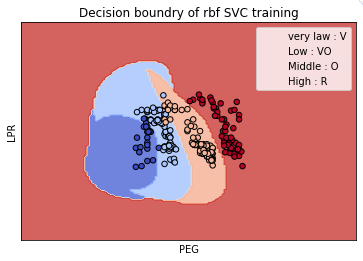

In [ ]:
#define a function to make the mesh grid
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
#define a function to make the contour plot
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of rbf SVC training')
# Set-up grid for plotting.
X0, X1 = x_train['PEG'], x_train['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['very law : V','Low : VO' , 'Middle : O' ,'High : R'])
plt.show()


# Decision boundries for test

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


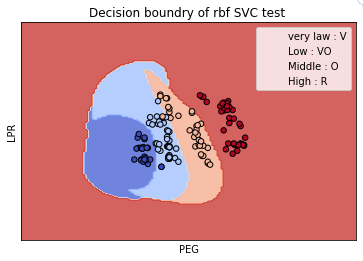

In [ ]:
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of rbf SVC test ')
# Set-up grid for plotting.
X0, X1 = x_test['PEG'], x_test['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['very law : V','Low : VO' , 'Middle : O' ,'High : R'])
plt.show()

#Implementing Multi-layer Perceptron classifier


In [ ]:
from sklearn.neural_network import MLPClassifier #to import Multi-layer Perceptron classifier library
pc = MLPClassifier()
pc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
y_pred_pc = pc.predict(x_test)

In [ ]:
#print the classification report of MLPClassifier for training dataset
print(classification_report(pc.predict(x_train),y_train))

              precision    recall  f1-score   support

           1       0.08      1.00      0.15         2
           2       1.00      0.70      0.83       118
           3       0.84      0.99      0.91        75
           4       0.98      0.98      0.98        63

    accuracy                           0.86       258
   macro avg       0.73      0.92      0.72       258
weighted avg       0.94      0.86      0.88       258



In [ ]:
#print the classification report of MLPClassifier for testing dataset
print(classification_report(y_pred_pc,y_test))

              precision    recall  f1-score   support

           1       0.04      1.00      0.07         1
           2       0.96      0.56      0.71        78
           3       0.65      0.92      0.76        24
           4       1.00      0.93      0.96        42

    accuracy                           0.73       145
   macro avg       0.66      0.85      0.63       145
weighted avg       0.91      0.73      0.79       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


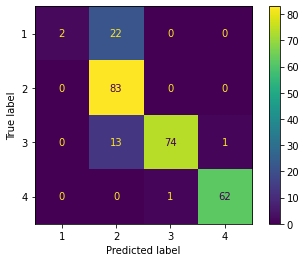

In [ ]:
#show the confusion matrix of Multi-layer Perceptron classifier for training dataset
plot_confusion_matrix(pc,x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


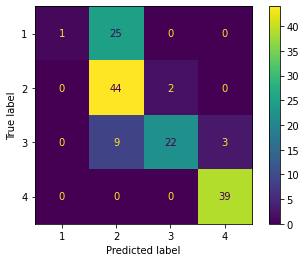

In [ ]:
#show the confusion matrix of Multi-layer Perceptron classifier for testing dataset
plot_confusion_matrix(pc,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


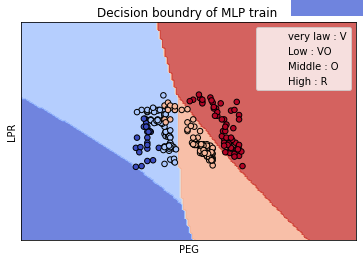

In [ ]:
#print decision boundry of MLPClassifier for training dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP train ')
# Set-up grid for plotting.
X0, X1 = x_train['PEG'], x_train['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['very law : V','Low : VO' , 'Middle : O' ,'High : R'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


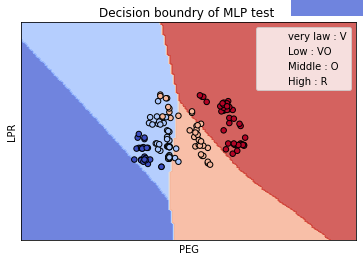

In [ ]:
#print decision boundry of MLPClassifier for testing dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP test ')
# Set-up grid for plotting.
X0, X1 = x_test['PEG'], x_test['LPR']
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, pc.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['very law : V','Low : VO' , 'Middle : O' ,'High : R'])
plt.show()

##Implementing One-vs-the-rest (OvR) multiclass strategy.

In [ ]:
#take a copy from the dataset
df_1 = df.copy()

In [ ]:
#print dataset 
df_1

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,1
1,0.08,0.08,0.10,0.24,0.90,4
2,0.06,0.06,0.05,0.25,0.33,2
3,0.10,0.10,0.15,0.65,0.30,3
4,0.08,0.08,0.08,0.98,0.24,2
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,4
254,0.78,0.61,0.71,0.19,0.60,3
255,0.54,0.82,0.71,0.29,0.77,4
256,0.50,0.75,0.81,0.61,0.26,3


In [ ]:
#take a copy from the test data
df_test_1 = df_test.copy()

In [ ]:
#print testing dataset 
df_test_1

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
0,0.00,0.10,0.50,0.26,0.05,1,NaN,NaN,STG (The degree of study time for goal object ...
1,0.05,0.05,0.55,0.60,0.14,2,NaN,NaN,SCG (The degree of repetition number of user f...
2,0.08,0.18,0.63,0.60,0.85,4,NaN,NaN,STR (The degree of study time of user for rela...
3,0.20,0.20,0.68,0.67,0.85,4,NaN,NaN,LPR (The exam performance of user for related ...
4,0.22,0.22,0.90,0.30,0.90,4,NaN,NaN,PEG (The exam performance of user for goal obj...
...,...,...,...,...,...,...,...,...,...
140,0.90,0.78,0.62,0.32,0.89,4,NaN,NaN,NaN
141,0.85,0.82,0.66,0.83,0.83,4,NaN,NaN,NaN
142,0.56,0.60,0.77,0.13,0.32,2,NaN,NaN,NaN
143,0.66,0.68,0.81,0.57,0.57,3,NaN,NaN,NaN


#One-vs-the-rest (OvR) for class 1





In [ ]:
#training data for ovr 1 
x_train_ovr_1 = df_1[['PEG','LPR']]

In [ ]:
y_train_ovr_1 = df_1['UNS'].map({4 : 1, 3 : 0, 2 : 0, 1 : 0})# High = 1 All = 0
print(y_train_ovr_1)

0      0
1      1
2      0
3      0
4      0
      ..
253    1
254    0
255    1
256    0
257    1
Name: UNS, Length: 258, dtype: int64


In [ ]:
#count the values of y data for training One-vs-the-rest (OvR) multiclass strategy.
y_train_ovr_1.value_counts()

0    195
1     63
Name: UNS, dtype: int64

In [ ]:
#testing data for ovr 1 
x_test_ovr_1 = df_test_1[['PEG','LPR']]

In [ ]:
y_test_ovr_1 = df_test_1[' UNS'].map({4 : 1, 3 : 0, 2 : 0, 1 : 0})

In [ ]:
#count the values of y data for testing One-vs-the-rest (OvR) multiclass strategy.
y_test_ovr_1.value_counts()

0    106
1     39
Name:  UNS, dtype: int64

In [ ]:
svm_ovr_1 = SVC() # High = 1 All = 0
svm_ovr_1.fit(x_train_ovr_1,y_train_ovr_1)

SVC()

In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for training dataset
print(classification_report(y_train_ovr_1,svm_ovr_1.predict(x_train_ovr_1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       195
           1       0.98      0.98      0.98        63

    accuracy                           0.99       258
   macro avg       0.99      0.99      0.99       258
weighted avg       0.99      0.99      0.99       258



In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for testing dataset
print(classification_report(y_test_ovr_1,svm_ovr_1.predict(x_test_ovr_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        39

    accuracy                           1.00       145
   macro avg       1.00      1.00      1.00       145
weighted avg       1.00      1.00      1.00       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


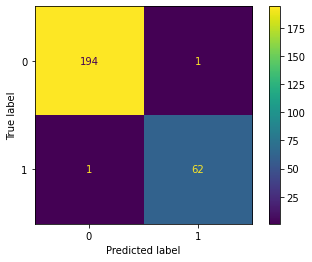

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for training dataset
plot_confusion_matrix(svm_ovr_1,x_train_ovr_1,y_train_ovr_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


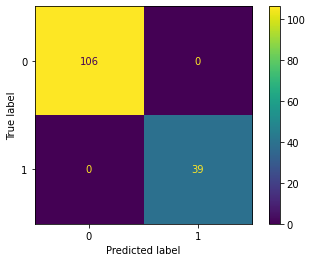

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for testing dataset
plot_confusion_matrix(svm_ovr_1,x_test_ovr_1,y_test_ovr_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


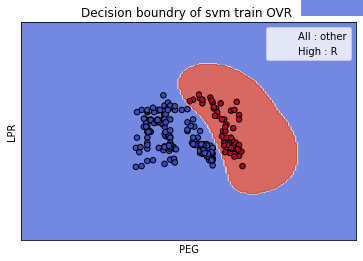

In [ ]:
#print decision boundry of SVM for training dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm train OVR ')
# Set-up grid for plotting.
X0, X1 = x_train_ovr_1['PEG'], x_train_ovr_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_1.fit(x_train_ovr_1, y_train_ovr_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovr_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'High : R'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


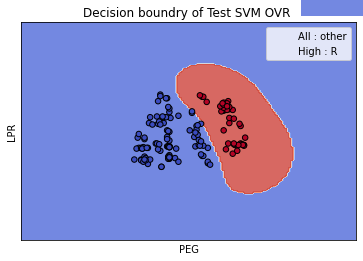

In [ ]:
#print decision boundry of SVM for testing dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of Test SVM OVR ')
# Set-up grid for plotting.
X0, X1 = x_test_ovr_1['PEG'], x_test_ovr_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_1.fit(x_train_ovr_1, y_train_ovr_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovr_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'High : R'])
plt.show()

In [ ]:
score_1 = svm_ovr_1.score(x_test_ovr_1,y_test_ovr_1)

#One-vs-the-rest (OvR) for class 2

In [ ]:
#training data for ovr 2
x_train_ovr_2 = df_1[['PEG','LPR']]
y_train_ovr_2 = df_1['UNS'].map({4 : 0, 3 : 0, 2 : 0, 1 : 1})

In [ ]:
#testing data for ovr 2
x_test_ovr_2 = df_test_1[['PEG','LPR']]
y_test_ovr_2 = df_test_1[' UNS'].map({4 : 0, 3 : 0, 2 : 0, 1 : 1})# Very Low = 1 All = 0

In [ ]:
#count the values of y data for training One-vs-the-rest (OvR) multiclass strategy.
y_train_ovr_2.value_counts()

0    234
1     24
Name: UNS, dtype: int64

In [ ]:
#count the values of y data for testing One-vs-the-rest (OvR) multiclass strategy.
y_test_ovr_2.value_counts()

0    119
1     26
Name:  UNS, dtype: int64

In [ ]:
svm_ovr_2 = SVC()
svm_ovr_2.fit(x_train_ovr_2,y_train_ovr_2)

SVC()

In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for training 2 dataset
print(classification_report(y_train_ovr_2,svm_ovr_2.predict(x_train_ovr_2)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       234
           1       1.00      0.79      0.88        24

    accuracy                           0.98       258
   macro avg       0.99      0.90      0.94       258
weighted avg       0.98      0.98      0.98       258



In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for testing 2 dataset
print(classification_report(y_test_ovr_2,svm_ovr_2.predict(x_test_ovr_2)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      0.92      0.96        26

    accuracy                           0.99       145
   macro avg       0.99      0.96      0.98       145
weighted avg       0.99      0.99      0.99       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


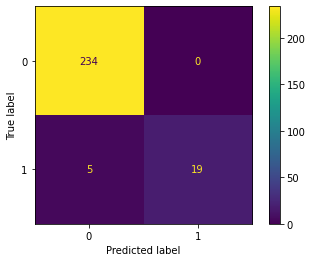

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for training 2 dataset
plot_confusion_matrix(svm_ovr_2,x_train_ovr_2,y_train_ovr_2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


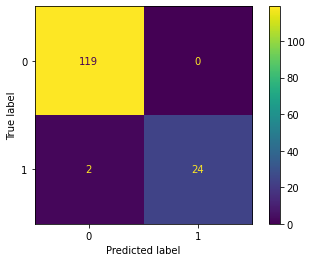

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for testing 2 dataset
plot_confusion_matrix(svm_ovr_2,x_test_ovr_2,y_test_ovr_2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


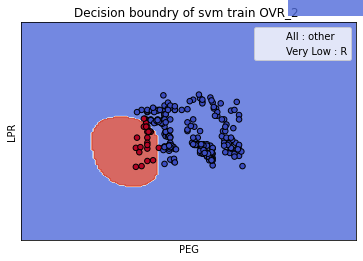

In [ ]:
#print decision boundry of SVM for training 2 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm train OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovr_2['PEG'], x_train_ovr_2['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_2.fit(x_train_ovr_2, y_train_ovr_2), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovr_2, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Very Low : R'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


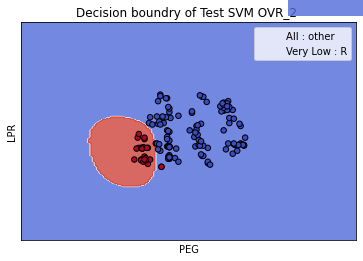

In [ ]:
#print decision boundry of SVM for testing 2 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of Test SVM OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovr_2['PEG'], x_test_ovr_2['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_2.fit(x_train_ovr_2, y_train_ovr_2), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovr_2, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Very Low : R'])
plt.show()

In [ ]:
#calculate accuracy of class 2
score_2 = svm_ovr_2.score(x_test_ovr_2,y_test_ovr_2)

In [ ]:
#print accuracy of class 2
score_2

0.9862068965517241

#One-vs-the-rest (OvR) for class 3

In [ ]:
#training data for ovr 3
x_train_ovr_3 = df_1[['PEG','LPR']]
y_train_ovr_3 = df_1['UNS'].map({4 : 0, 3 : 0, 2 : 1, 1 : 0})

In [ ]:
#testing data for ovr 3
x_test_ovr_3 = df_test_1[['PEG','LPR']] # Low= 1 All = 0
y_test_ovr_3 = df_test_1[' UNS'].map({4 : 0, 3 : 0, 2 : 1, 1 : 0})

In [ ]:
#count the values of y data for training One-vs-the-rest (OvR) multiclass strategy.
y_train_ovr_3.value_counts()

0    175
1     83
Name: UNS, dtype: int64

In [ ]:
#count the values of y data for testing One-vs-the-rest (OvR) multiclass strategy.
y_test_ovr_3.value_counts()

0    99
1    46
Name:  UNS, dtype: int64

In [ ]:
svm_ovr_3 = SVC()
svm_ovr_3.fit(x_train_ovr_3,y_train_ovr_3)

SVC()

In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for training 3 dataset
print(classification_report(y_train_ovr_3,svm_ovr_3.predict(x_train_ovr_3)))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       175
           1       0.86      0.99      0.92        83

    accuracy                           0.95       258
   macro avg       0.93      0.96      0.94       258
weighted avg       0.95      0.95      0.95       258



In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for testing 3 dataset
print(classification_report(y_test_ovr_3,svm_ovr_3.predict(x_test_ovr_3)))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        99
           1       0.92      1.00      0.96        46

    accuracy                           0.97       145
   macro avg       0.96      0.98      0.97       145
weighted avg       0.97      0.97      0.97       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


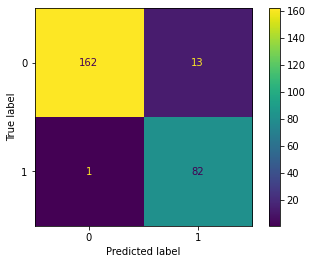

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for training 3 dataset
plot_confusion_matrix(svm_ovr_3,x_train_ovr_3,y_train_ovr_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


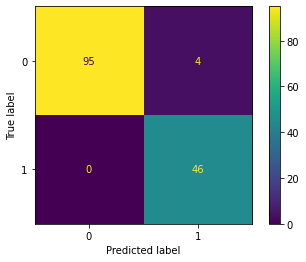

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for testing 3 dataset
plot_confusion_matrix(svm_ovr_3,x_test_ovr_3,y_test_ovr_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


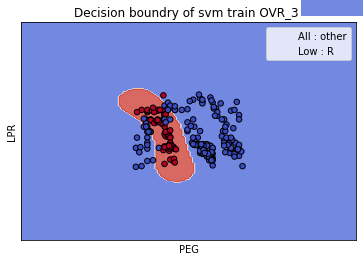

In [ ]:
#print decision boundry of SVM for training 3 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm train OVR_3 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovr_3['PEG'], x_train_ovr_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_3.fit(x_train_ovr_3, y_train_ovr_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovr_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Low : R'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


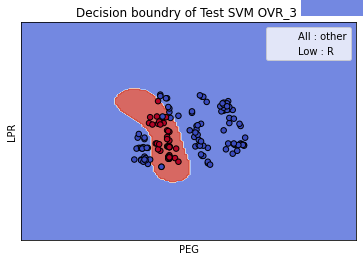

In [ ]:
#print decision boundry of SVM for testing 3 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of Test SVM OVR_3 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovr_3['PEG'], x_test_ovr_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_3.fit(x_train_ovr_3, y_train_ovr_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovr_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Low : R'])
plt.show()

In [ ]:
#calculate accuracy of class 3
score_3 = svm_ovr_3.score(x_test_ovr_3,y_test_ovr_3)

In [ ]:
#print accuracy
score_3

0.9724137931034482

#One-vs-the-rest (OvR) for class 4

In [ ]:
#training data for ovr 4
x_train_ovr_4 = df_1[['PEG','LPR']]
y_train_ovr_4 = df_1['UNS'].map({4 : 0, 3 : 1, 2 : 0, 1 : 0})

In [ ]:
#testing data for ovr 3
x_test_ovr_4 = df_test_1[['PEG','LPR']]
y_test_ovr_4 = df_test_1[' UNS'].map({4 : 0, 3 : 1, 2 : 0, 1 : 0})

In [ ]:
svm_ovr_4 = SVC()
svm_ovr_4.fit(x_train_ovr_4,y_train_ovr_4)

SVC()

In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for training 4 dataset
print(classification_report(y_train_ovr_4,svm_ovr_4.predict(x_train_ovr_4)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       170
           1       0.99      0.89      0.93        88

    accuracy                           0.96       258
   macro avg       0.97      0.94      0.95       258
weighted avg       0.96      0.96      0.96       258



In [ ]:
#print the classification report of One-vs-the-rest (OvR) multiclass strategy for testing 4 dataset
print(classification_report(y_test_ovr_4,svm_ovr_4.predict(x_test_ovr_4)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.85      0.92        34

    accuracy                           0.97       145
   macro avg       0.98      0.93      0.95       145
weighted avg       0.97      0.97      0.96       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


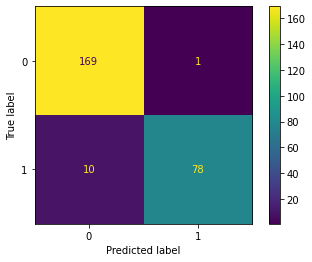

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for training 4 dataset
plot_confusion_matrix(svm_ovr_4,x_train_ovr_4,y_train_ovr_4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


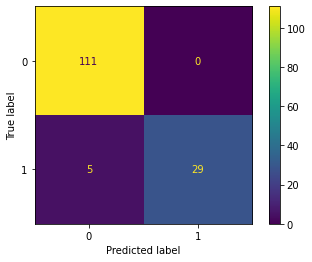

In [ ]:
#print the confusion matrix of One-vs-the-rest (OvR) multiclass strategy for testing 4 dataset
plot_confusion_matrix(svm_ovr_4,x_test_ovr_4,y_test_ovr_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


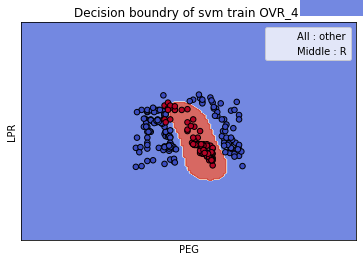

In [ ]:
#print decision boundry of SVM for training 4 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm train OVR_4 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovr_4['PEG'], x_train_ovr_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_4.fit(x_train_ovr_4, y_train_ovr_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovr_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Middle : R'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


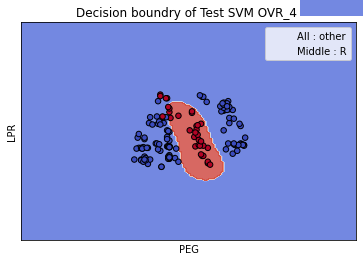

In [ ]:
#print decision boundry of SVM for testing 4 dataset for One-vs-the-rest (OvR) multiclass strategy
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of Test SVM OVR_4 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovr_4['PEG'], x_test_ovr_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovr_4.fit(x_train_ovr_4, y_train_ovr_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovr_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['All : other' ,'Middle : R'])
plt.show()

In [ ]:
#calculate accuracy of class 4
score_4 = svm_ovr_4.score(x_test_ovr_4,y_test_ovr_4)

In [ ]:
#print accuracy
score_4

0.9655172413793104

In [ ]:
# Model_1 : High , Model_2 : Middle , Model_3 : Low , Model_4 : Very_low
def actualclass_svm_ovr(x_test):

  result = ['High','Very Low','Low','Middle']
  arg = np.argmax([svm_ovr_1.predict(x_test),svm_ovr_2.predict(x_test),svm_ovr_3.predict(x_test),svm_ovr_4.predict(x_test)])

  return result[arg]

In [ ]:
actualclass_svm_ovr([[0.8,0.9]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'High'

In [ ]:
actualclass_svm_ovr([[0.1,0.1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'Very Low'

In [ ]:
actualclass_svm_ovr([[0.5,0.6]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'Middle'

In [ ]:
actualclass_svm_ovr([[0.4,0.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


'Low'

In [ ]:
svm_ovr_proba_1 = SVC(probability=True)
svm_ovr_proba_1.fit(x_train_ovr_1,y_train_ovr_1)
svm_ovr_proba_2 = SVC(probability=True)
svm_ovr_proba_2.fit(x_train_ovr_1,y_train_ovr_2)
svm_ovr_proba_3 = SVC(probability=True)
svm_ovr_proba_3.fit(x_train_ovr_1,y_train_ovr_3)
svm_ovr_proba_4 = SVC(probability=True)
svm_ovr_proba_4.fit(x_train_ovr_4,y_train_ovr_4)

SVC(probability=True)

In [ ]:
def actualclass_prob(model_1,model_2,model_3,model_4,x_test):
  prob_1 = model_1.predict_proba(x_test)[:,1].reshape(-1,1)
  prob_2 = model_2.predict_proba(x_test)[:,1].reshape(-1,1)
  prob_3 = model_3.predict_proba(x_test)[:,1].reshape(-1,1)
  prob_4 = model_4.predict_proba(x_test)[:,1].reshape(-1,1)

  y = np.hstack((prob_1,prob_2,prob_3,prob_4))

  return np.argmax(y,axis = 1)



In [ ]:
y_pridect = actualclass_prob(svm_ovr_proba_1,svm_ovr_proba_2,svm_ovr_proba_3,svm_ovr_proba_4,x_test)

In [ ]:
y_pridect

array([1, 2, 0, 0, 0, 2, 3, 2, 0, 1, 3, 1, 0, 3, 0, 1, 0, 1, 2, 3, 0, 2,
       2, 2, 3, 1, 2, 3, 3, 2, 2, 2, 3, 0, 2, 3, 2, 0, 3, 3, 1, 2, 0, 1,
       0, 1, 3, 3, 0, 1, 3, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 3, 0, 2, 3, 2,
       3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 3, 0, 2, 1, 2, 3, 2, 0, 1,
       2, 0, 2, 2, 2, 1, 2, 3, 0, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 0,
       2, 1, 1, 3, 3, 2, 0, 2, 3, 0, 0, 1, 2, 3, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 3, 3])

In [ ]:
y = []
for i in y_test:
  if i == 4:
    y.append(0)
  else:
    y.append(i)  

y = np.array(y)
y

array([1, 2, 0, 0, 0, 2, 3, 2, 0, 1, 3, 1, 0, 3, 0, 1, 0, 1, 2, 3, 0, 2,
       2, 2, 3, 1, 2, 3, 3, 1, 2, 2, 3, 0, 2, 3, 2, 0, 3, 3, 1, 2, 0, 1,
       0, 1, 3, 3, 0, 1, 3, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 3, 0, 2, 3, 2,
       3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 3, 0, 1, 1, 2, 3, 2, 0, 1,
       2, 0, 2, 3, 2, 1, 2, 3, 0, 2, 1, 2, 3, 2, 3, 3, 1, 2, 3, 3, 2, 0,
       2, 2, 1, 3, 3, 2, 0, 2, 3, 0, 0, 1, 2, 3, 1, 0, 2, 0, 1, 0, 2, 2,
       0, 2, 3, 2, 2, 2, 2, 2, 0, 0, 2, 3, 3])

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy = ', accuracy_score(y_pridect,y))

accuracy =  0.9724137931034482


In [ ]:
y_true_p = y ==y_pridect

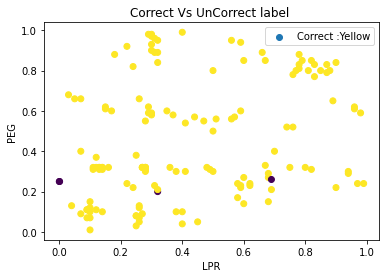

In [ ]:
plt.scatter(x_test['LPR'],x_test['PEG'],c = y_true_p )
plt.title('Correct Vs UnCorrect label ')
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.legend(labels = ['Correct :Yellow'])

##In OVR the accuarcy in all probabilities was very good , less accuarcy in probability-4 with class middle vs. low ,it is 79% in train and 92% in test and the accuracy in class "Middle" 89% in train and 85% in test becouse the classes "Very-Low" and "Middle" are so close with other classes so it cannot be separated in some data. but the accuracy in class "High" and "Low" are so well.

# another solution for OVR 

#One-vs-the-rest (OvR) for class 1

In [ ]:
svm_other_1 = SVC(kernel='linear', decision_function_shape='ovr', C=1)
svm_other_1.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
#print the classification report of SVM classifier for training 1 dataset
print(classification_report(y_train,svm_other_1.predict(x_train)))

              precision    recall  f1-score   support

           1       1.00      0.04      0.08        24
           2       0.72      1.00      0.83        83
           3       0.99      0.88      0.93        88
           4       0.98      0.98      0.98        63

    accuracy                           0.86       258
   macro avg       0.92      0.73      0.71       258
weighted avg       0.90      0.86      0.83       258



In [ ]:
#print the classification report of SVM classifier for testing 1 dataset
print(classification_report(y_test,svm_other_1.predict(x_test)))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        26
           2       0.57      1.00      0.72        46
           3       1.00      0.65      0.79        34
           4       0.93      1.00      0.96        39

    accuracy                           0.74       145
   macro avg       0.62      0.66      0.62       145
weighted avg       0.66      0.74      0.67       145



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


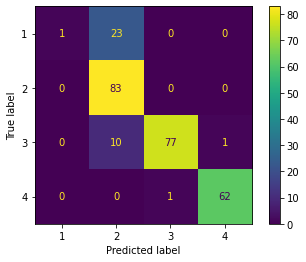

In [ ]:
#show the confusion matrix of SVM classifier for training 1 dataset
plot_confusion_matrix(svm_other_1,x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


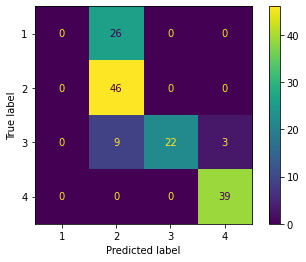

In [ ]:
#show the confusion matrix of SVM classifier for testing 1 dataset
plot_confusion_matrix(svm_other_1,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


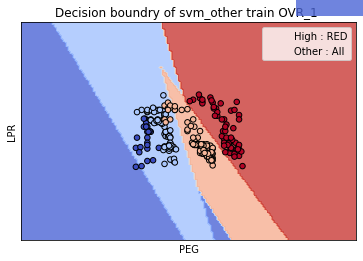

In [ ]:
#print decision boundry of SVM for training OVR1 dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other train OVR_1 ')
# Set-up grid for plotting.
X0, X1 = x_train['PEG'], x_train['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_1.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


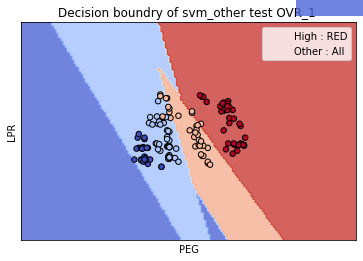

In [ ]:
#print decision boundry of SVM for testing OVR1 dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other test OVR_1 ')
# Set-up grid for plotting.
X0, X1 = x_test['PEG'], x_test['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_1.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

#One-vs-the-rest (OvR) for class 2

In [ ]:
svm_other_2 = SVC(kernel='poly', decision_function_shape='ovr', C=1)
svm_other_2.fit(x_train,y_train)

SVC(C=1, kernel='poly')

In [ ]:
#print the classification report of SVM classifier for training OVR2 dataset
print(classification_report(y_train,svm_other_2.predict(x_train)))

              precision    recall  f1-score   support

           1       0.95      0.88      0.91        24
           2       0.92      0.99      0.95        83
           3       0.99      0.94      0.97        88
           4       0.98      0.98      0.98        63

    accuracy                           0.96       258
   macro avg       0.96      0.95      0.95       258
weighted avg       0.96      0.96      0.96       258



In [ ]:
#print the classification report of SVM classifier for testing OVR2 dataset
print(classification_report(y_test,svm_other_2.predict(x_test)))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        26
           2       0.93      0.93      0.93        46
           3       0.97      0.91      0.94        34
           4       1.00      1.00      1.00        39

    accuracy                           0.96       145
   macro avg       0.96      0.96      0.96       145
weighted avg       0.96      0.96      0.96       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


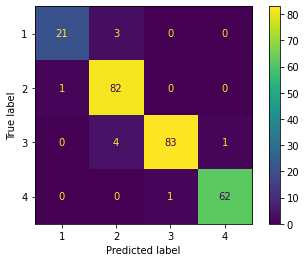

In [ ]:
#print decision boundry of SVM for training OVR2 dataset
plot_confusion_matrix(svm_other_2,x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


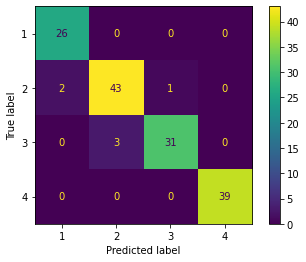

In [ ]:
#print decision boundry of SVM for testing OVR2 dataset
plot_confusion_matrix(svm_other_2,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


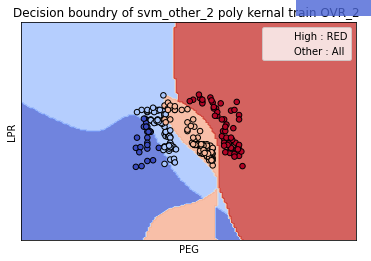

In [ ]:
#print decision boundry of SVM for training OVR2 dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other_2 poly kernal train OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_train['PEG'], x_train['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_2.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


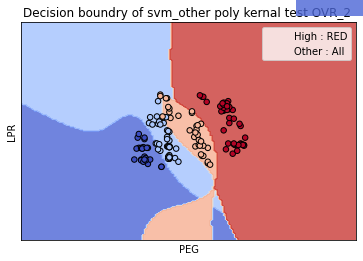

In [ ]:
#print decision boundry of SVM for testing OVR2 dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other poly kernal test OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_test['PEG'], x_test['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_2.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

#One-vs-the-rest (OvR) for class 3

In [ ]:
svm_other_3 = SVC(kernel='rbf', decision_function_shape='ovr', C=1)
svm_other_3.fit(x_train,y_train)

SVC(C=1)

In [ ]:
#print the classification report of SVM classifier for training dataset
print(classification_report(y_train,svm_other_3.predict(x_train)))

              precision    recall  f1-score   support

           1       1.00      0.79      0.88        24
           2       0.90      0.99      0.94        83
           3       0.98      0.94      0.96        88
           4       0.98      0.98      0.98        63

    accuracy                           0.95       258
   macro avg       0.97      0.93      0.94       258
weighted avg       0.96      0.95      0.95       258



In [ ]:
#print the classification report of SVM classifier for testing dataset
print(classification_report(y_test,svm_other_3.predict(x_test)))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        26
           2       0.94      1.00      0.97        46
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        39

    accuracy                           0.98       145
   macro avg       0.98      0.97      0.98       145
weighted avg       0.98      0.98      0.98       145



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


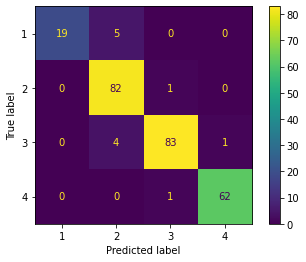

In [ ]:
#print decision boundry of SVM for training dataset
plot_confusion_matrix(svm_other_3,x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


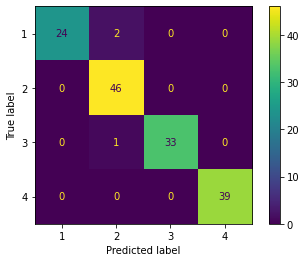

In [ ]:
#print decision boundry of SVM for testing dataset
plot_confusion_matrix(svm_other_3,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


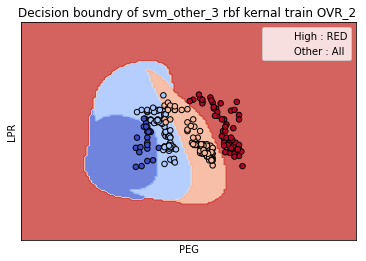

In [ ]:
#print decision boundry of SVM for training dataset OVR3
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other_3 rbf kernal train OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_train['PEG'], x_train['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_3.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


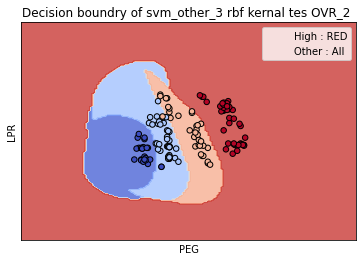

In [ ]:
#print decision boundry of SVM for testing dataset OVR3
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm_other_3 rbf kernal tes OVR_2 ')
# Set-up grid for plotting.
X0, X1 = x_test['PEG'], x_test['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_other_3.fit(x_train, y_train), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Other : All'])
plt.show()

In [ ]:
most_model_fited = np.argmax([svm_other_1.score(x_test,y_test),svm_other_2.score(x_test,y_test),svm_other_3.score(x_test,y_test)])

In [ ]:
most_model_fited # Model 3 has the best accuracy on testing data 

2

# problem 3: Implement OneVsOne Classifier

In [ ]:
df_2 = df[((df['UNS']== 4) | (df['UNS']==3))] 

In [ ]:
#print the dataset
df_2

,STG,SCG,STR,LPR,PEG,UNS
1,0.08,0.08,0.10,0.24,0.90,4
3,0.10,0.10,0.15,0.65,0.30,3
5,0.09,0.15,0.40,0.10,0.66,3
6,0.10,0.10,0.43,0.29,0.56,3
9,0.00,0.00,0.50,0.20,0.85,4
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,4
254,0.78,0.61,0.71,0.19,0.60,3
255,0.54,0.82,0.71,0.29,0.77,4
256,0.50,0.75,0.81,0.61,0.26,3


In [ ]:
#prepare testing dataset
df_test_2 = df_test[((df_test[' UNS']==4)| (df_test[' UNS']==3))]

In [ ]:
#print testing dataset
df_test_2

,STG,SCG,STR,LPR,PEG,UNS,Unnamed: 6,Unnamed: 7,Attribute Information:
2,0.08,0.18,0.63,0.60,0.85,4,NaN,NaN,STR (The degree of study time of user for rela...
3,0.20,0.20,0.68,0.67,0.85,4,NaN,NaN,LPR (The exam performance of user for related ...
4,0.22,0.22,0.90,0.30,0.90,4,NaN,NaN,PEG (The exam performance of user for goal obj...
6,0.16,0.16,0.80,0.50,0.50,3,NaN,NaN,NaN
8,0.20,0.20,0.88,0.77,0.80,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
134,0.68,0.43,0.60,0.47,0.55,3,NaN,NaN,NaN
140,0.90,0.78,0.62,0.32,0.89,4,NaN,NaN,NaN
141,0.85,0.82,0.66,0.83,0.83,4,NaN,NaN,NaN
143,0.66,0.68,0.81,0.57,0.57,3,NaN,NaN,NaN


In [ ]:
#prepare traing dataset for OVO classification
x_train_ovo = df_2[['PEG','LPR']]
y_train_ovo = df_2['UNS'].map({4 : 1,  3 : 0})

In [ ]:
#prepare testing dataset for OVO classification
x_test_ovo = df_test_2[['PEG','LPR']]
y_test_ovo = df_test_2[' UNS'].map({4 : 1,  3 : 0})

#Implementing OVO with SVM model High vs. Middle

In [ ]:
svm_ovo = SVC()# High vs Low
svm_ovo.fit(x_train_ovo,y_train_ovo)

SVC()

In [ ]:
#print the classification report of SVM OVO for tarining dataset
print(classification_report(y_train_ovo,svm_ovo.predict(x_train_ovo)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.98      0.98        63

    accuracy                           0.99       151
   macro avg       0.99      0.99      0.99       151
weighted avg       0.99      0.99      0.99       151



In [ ]:
#print the classification report of SVM OVO for testing dataset
print(classification_report(y_test_ovo,svm_ovo.predict(x_test_ovo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


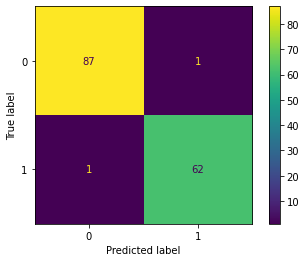

In [ ]:
#print the confusion matrix of SVM OVO for tarining dataset
plot_confusion_matrix(svm_ovo,x_train_ovo,y_train_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


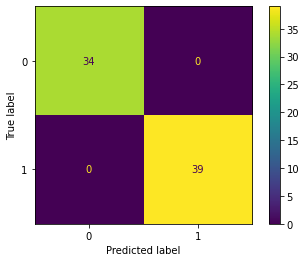

In [ ]:
#print the confusion matrix of SVM OVO for testing dataset
plot_confusion_matrix(svm_ovo,x_test_ovo,y_test_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


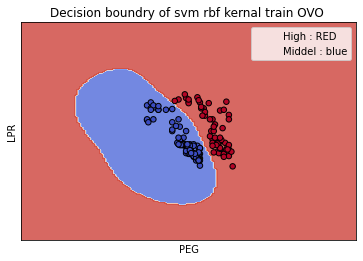

In [ ]:
#print decision boundry of SVM OVO for tarining dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm rbf kernal train OVO ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo['PEG'], x_train_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middel : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


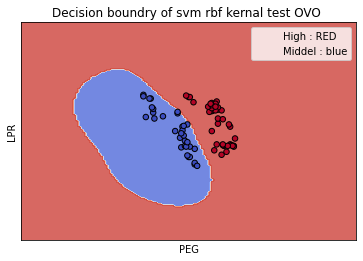

In [ ]:
#print decision boundry of SVM OVO for testing dataset
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of svm rbf kernal test OVO ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo['PEG'], x_test_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middel : blue'])
plt.show()

#Implementing OVO with logistic regression model  High vs. Middle

In [ ]:
from sklearn.linear_model import LogisticRegression #to import logistic regression classifier
lr_ovo = LogisticRegression()
lr_ovo.fit(x_train_ovo,y_train_ovo)

LogisticRegression()

In [ ]:
#print the classification report of logistic regression classifier for training OVO dataset
print(classification_report(y_train_ovo,lr_ovo.predict(x_train_ovo)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        88
           1       0.98      0.97      0.98        63

    accuracy                           0.98       151
   macro avg       0.98      0.98      0.98       151
weighted avg       0.98      0.98      0.98       151



In [ ]:
#print the classification report of logistic regression classifier for testing OVO dataset
print(classification_report(y_test_ovo,lr_ovo.predict(x_test_ovo)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        39

    accuracy                           1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


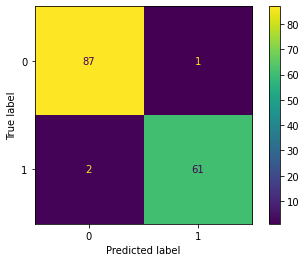

In [ ]:
#print the confusion matrix of logistic regression classifier for training OVO dataset
plot_confusion_matrix(lr_ovo,x_train_ovo,y_train_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


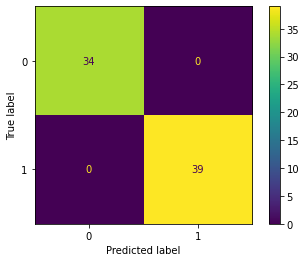

In [ ]:
#print the confusion matrix of logistic regression classifier for testing OVO dataset
plot_confusion_matrix(lr_ovo,x_test_ovo,y_test_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


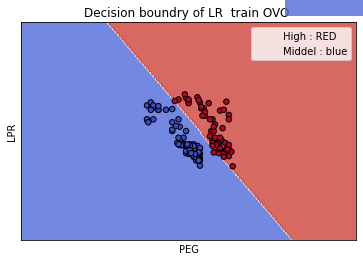

In [ ]:
#print decision boundry of logistic regression classifier for training OVO dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo['PEG'], x_train_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middel : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


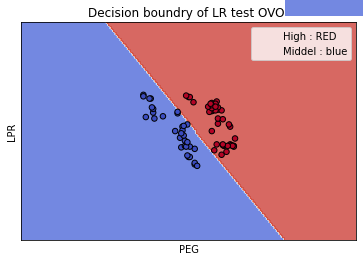

In [ ]:
#print decision boundry of logistic regression classifier for testing OVO dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR test OVO ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo['PEG'], x_test_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middel : blue'])
plt.show()

#Implementing OVO with MLP classifier High vs. Middle

In [ ]:
pc_ovo = MLPClassifier()
pc_ovo.fit(x_train_ovo,y_train_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print the classification report of MLP classifier for training OVO dataset
print(classification_report(y_train_ovo,pc_ovo.predict(x_train_ovo)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.98      0.92      0.95        63

    accuracy                           0.96       151
   macro avg       0.96      0.95      0.96       151
weighted avg       0.96      0.96      0.96       151



In [ ]:
#print the classification report of MLP classifier for testing OVO dataset
print(classification_report(y_test_ovo,pc_ovo.predict(x_test_ovo)))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        34
           1       0.93      1.00      0.96        39

    accuracy                           0.96        73
   macro avg       0.96      0.96      0.96        73
weighted avg       0.96      0.96      0.96        73



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


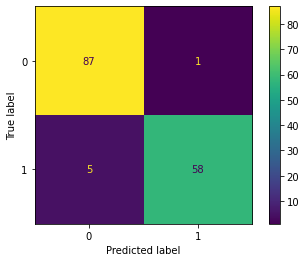

In [ ]:
#print the confusion matrix of MLP classifier for training OVO dataset
plot_confusion_matrix(pc_ovo,x_train_ovo,y_train_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


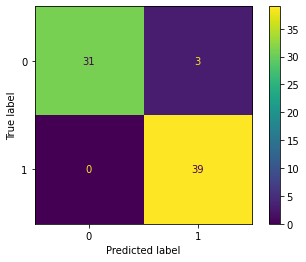

In [ ]:
#print the confusion matrix of MLP classifier for testing OVO dataset
plot_confusion_matrix(pc_ovo,x_test_ovo,y_test_ovo)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


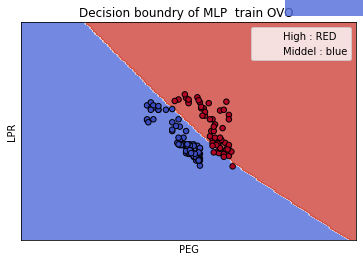

In [ ]:
#print decision boundry of MLP classifier for training OVO dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo['PEG'], x_train_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middel : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


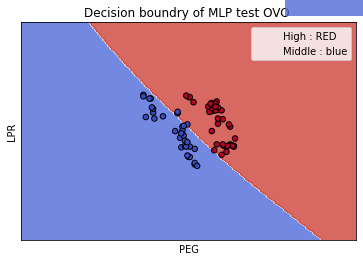

In [ ]:
#print decision boundry of MLP classifier for testing OVO dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP test OVO ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo['PEG'], x_test_ovo['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo.fit(x_train_ovo, y_train_ovo), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Middle : blue'])
plt.show()

#Implement OVO1 with SVM High Vs. low

In [ ]:
df_3 = df[((df['UNS']== 4) | (df['UNS']==2))] 

In [ ]:
df_test_3 = df_test[((df_test[' UNS']==4)| (df_test[' UNS']==2))]

In [ ]:
#training data for OVO1
x_train_ovo_1 = df_3[['PEG','LPR']]
y_train_ovo_1 = df_3['UNS'].map({4 : 1,  2 : 0})

In [ ]:
#testing data for OVO1
x_test_ovo_1 = df_test_3[['PEG','LPR']]
y_test_ovo_1 = df_test_3[' UNS'].map({4 : 1,  2 : 0})

In [ ]:
svm_ovo_1 = SVC() # Middle Vs Low
svm_ovo_1.fit(x_train_ovo_1,y_train_ovo_1)

SVC()

In [ ]:
#print classification report for training data fo SVM classifier for OVO1
print(classification_report(y_train_ovo_1,svm_ovo_1.predict(x_train_ovo_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        63

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [ ]:
#print classification report for testing data fo SVM classifier for OVO1
print(classification_report(y_test_ovo_1,svm_ovo_1.predict(x_test_ovo_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        39

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


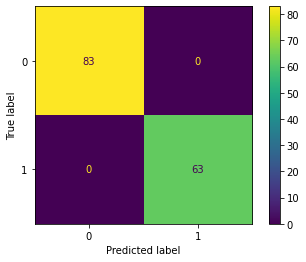

In [ ]:
#print confusion matrix for training data fo SVM classifier for OVO1
plot_confusion_matrix(svm_ovo_1,x_train_ovo_1,y_train_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


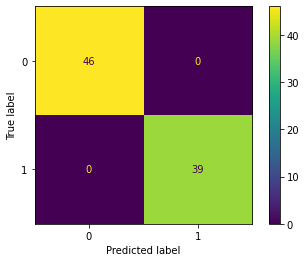

In [ ]:
#print confusion matrix for testing data fo SVM classifier for OVO1
plot_confusion_matrix(svm_ovo_1,x_test_ovo_1,y_test_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


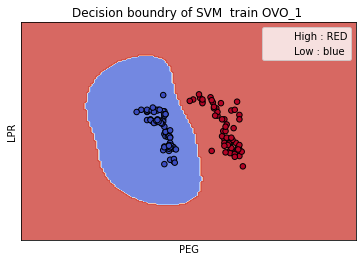

In [ ]:
#print decision boundry of SVM classifier for training OVO 1 dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  train OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_1['PEG'], x_train_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


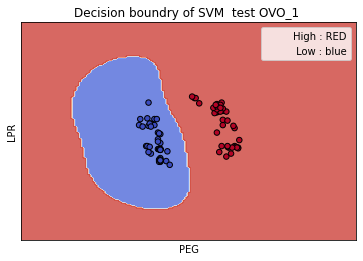

In [ ]:
#print decision boundry of SVM classifier for testing OVO 1 dataset 
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  test OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_1['PEG'], x_test_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,' Low : blue'])
plt.show()

#Implement OVO1 with logistic regression High Vs. low

In [ ]:
lr_ovo_1 = LogisticRegression()
lr_ovo_1.fit(x_train_ovo_1,y_train_ovo_1)

LogisticRegression()

In [ ]:
#print classification report for training data fo logistic regression classifier for OVO1
print(classification_report(y_train_ovo_1,lr_ovo_1.predict(x_train_ovo_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        63

    accuracy                           1.00       146
   macro avg       1.00      1.00      1.00       146
weighted avg       1.00      1.00      1.00       146



In [ ]:
#print classification report for testing data fo logistic regression classifier for OVO1
print(classification_report(y_test_ovo_1,lr_ovo_1.predict(x_test_ovo_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        39

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


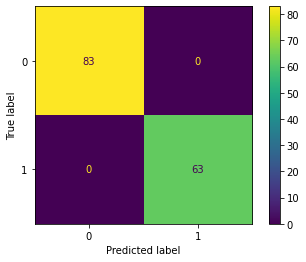

In [ ]:
#print confusion matrix for training data fo LR classifier for OVO1
plot_confusion_matrix(lr_ovo_1,x_train_ovo_1,y_train_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


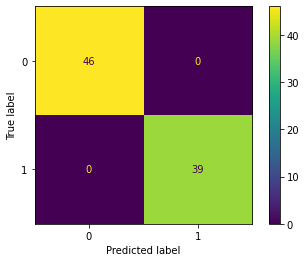

In [ ]:
#print confusion matrix for testing data fo LR classifier for OVO1
plot_confusion_matrix(lr_ovo_1,x_test_ovo_1,y_test_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


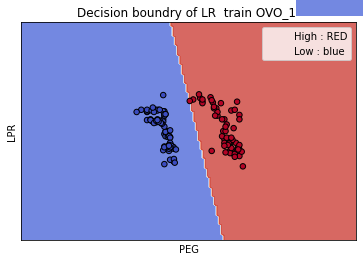

In [ ]:
#print Decision boundry for training data fo LR classifier for OVO1
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_1['PEG'], x_train_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


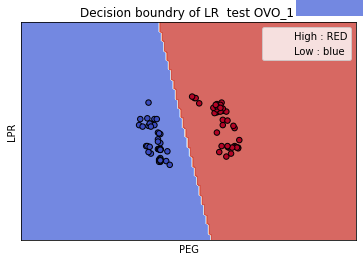

In [ ]:
#print Decision boundry for testing data fo LR classifier for OVO1
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  test OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_1['PEG'], x_test_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Low : blue'])
plt.show()

#Implemnt OVO1 with MLP classifier High Vs. low

In [ ]:
pc_ovo_1 = MLPClassifier()
pc_ovo_1.fit(x_train_ovo_1,y_train_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print classification report for training data fo MLP classifier for OVO1
print(classification_report(y_train_ovo_1,pc_ovo_1.predict(x_train_ovo_1)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        83
           1       1.00      0.98      0.99        63

    accuracy                           0.99       146
   macro avg       0.99      0.99      0.99       146
weighted avg       0.99      0.99      0.99       146



In [ ]:
#print classification report for testing data fo MLP classifier for OVO1
print(classification_report(y_test_ovo_1,pc_ovo_1.predict(x_test_ovo_1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        39

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


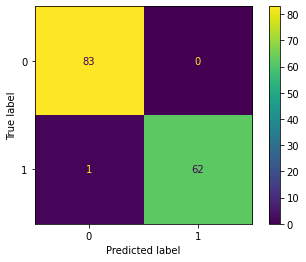

In [ ]:
#print confusion matrix for training data fo MLP classifier for OVO1
plot_confusion_matrix(pc_ovo_1,x_train_ovo_1,y_train_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


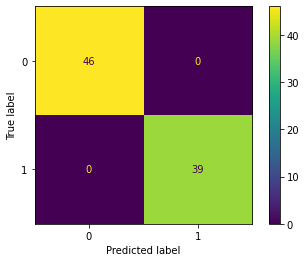

In [ ]:
#print confusion matrix for testing data fo MLP classifier for OVO1
plot_confusion_matrix(pc_ovo_1,x_test_ovo_1,y_test_ovo_1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


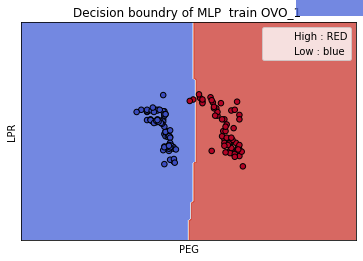

In [ ]:
#print Decision boundry for training data fo MLP classifier for OVO1
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_1['PEG'], x_train_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


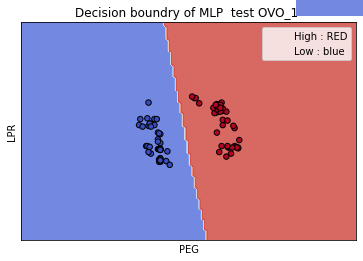

In [ ]:
#print Decision boundry for testing data fo MLP classifier for OVO1
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  test OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_1['PEG'], x_test_ovo_1['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_1.fit(x_train_ovo_1, y_train_ovo_1), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_1, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Low : blue'])
plt.show()

#Implementing SVM OVO3 High vs. very-low

In [ ]:
df_4 = df[((df['UNS']== 4) | (df['UNS']== 1))] 

In [ ]:
df_test_4 = df_test[((df_test[' UNS']== 4)| (df_test[' UNS']== 1))]

In [ ]:
x_train_ovo_3 = df_4[['PEG','LPR']]
y_train_ovo_3 = df_4['UNS'].map({4 : 1,  1 : 0})

In [ ]:
x_test_ovo_3 = df_test_4[['PEG','LPR']]
y_test_ovo_3 = df_test_4[' UNS'].map({4 : 1,  1 : 0})

In [ ]:
svm_ovo_3 = SVC() # Midle Vs HIGH
svm_ovo_3.fit(x_train_ovo_3,y_train_ovo_3)

SVC()

In [ ]:
#print classification_report for training data fo SVM classifier for OVO
print(classification_report(y_train_ovo_3,svm_ovo_3.predict(x_train_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        63

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



In [ ]:
#print classification_report for testing data fo SVM classifier for OVO
print(classification_report(y_test_ovo_3,svm_ovo_3.predict(x_test_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        39

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


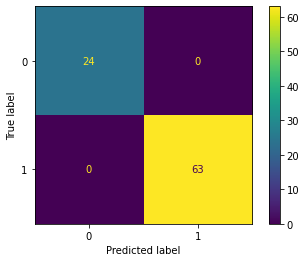

In [ ]:
#print confusion matrix for training data fo SVM classifier for OVO
plot_confusion_matrix(svm_ovo_3,x_train_ovo_3,y_train_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


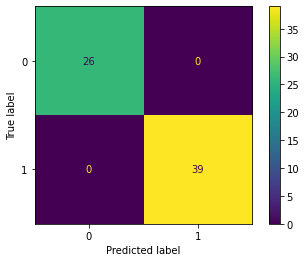

In [ ]:
#print confusion matrix for testing data fo SVM classifier for OVO
plot_confusion_matrix(svm_ovo_3,x_test_ovo_3,y_test_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


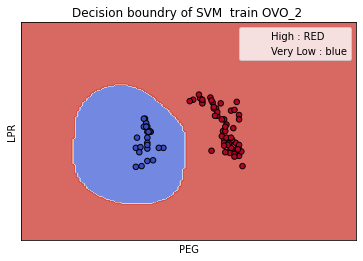

In [ ]:
#show Decision boundry of SVM  train OVO_2
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  train OVO_2 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_3['PEG'], x_train_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


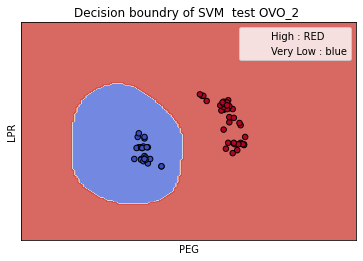

In [ ]:
#show Decision boundry of SVM  test OVO_2
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  test OVO_2 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_3['PEG'], x_test_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

#Implementing LR OVO3 High vs. very-low



In [ ]:
lr_ovo_3 = LogisticRegression()
lr_ovo_3.fit(x_train_ovo_3,y_train_ovo_3)

LogisticRegression()

In [ ]:
#print classification_report for training data fo LR classifier for OVO
print(classification_report(y_train_ovo_3,lr_ovo_3.predict(x_train_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        63

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



In [ ]:
#print classification_report for testing data fo LR classifier for OVO
print(classification_report(y_test_ovo_3,lr_ovo_3.predict(x_test_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        39

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


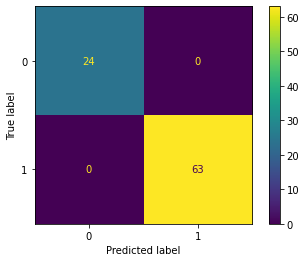

In [ ]:
#print confusion_matrix for training data fo LR classifier for OVO
plot_confusion_matrix(lr_ovo_3,x_train_ovo_3,y_train_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


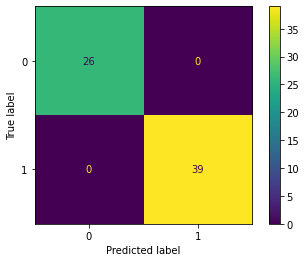

In [ ]:
#print confusion_matrix for testing data fo LR classifier for OVO
plot_confusion_matrix(lr_ovo_3,x_test_ovo_3,y_test_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


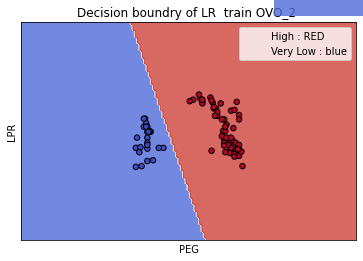

In [ ]:
#show Decision boundry of LR  train OVO
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO_2 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_3['PEG'], x_train_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


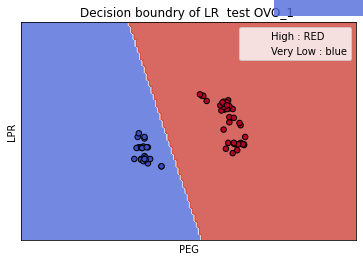

In [ ]:
#show Decision boundry of LR  test OVO
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  test OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_3['PEG'], x_test_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

#Implement MLP classifier for OVO3 High vs. very-low

In [ ]:
pc_ovo_3 = MLPClassifier()
pc_ovo_3.fit(x_train_ovo_3,y_train_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print classification_report of  MLP classifier for OVO middle Vs. High for training data
print(classification_report(y_train_ovo_3,pc_ovo_3.predict(x_train_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        63

    accuracy                           1.00        87
   macro avg       1.00      1.00      1.00        87
weighted avg       1.00      1.00      1.00        87



In [ ]:
#print classification_report of  MLP classifier for OVO middle Vs. High for testing data
print(classification_report(y_test_ovo_3,pc_ovo_3.predict(x_test_ovo_3)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        39

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


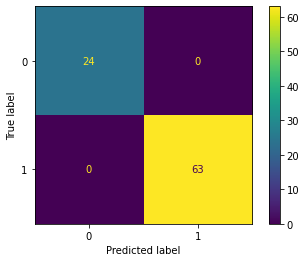

In [ ]:
#print confusion_matrix of  MLP classifier for OVO middle Vs. High for training data
plot_confusion_matrix(pc_ovo_3,x_train_ovo_3,y_train_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


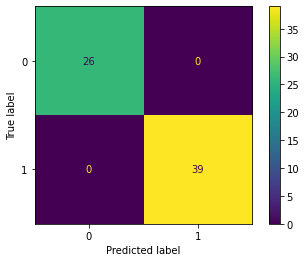

In [ ]:
#print confusion_matrix of  MLP classifier for OVO middle Vs. High for testing data
plot_confusion_matrix(pc_ovo_3,x_test_ovo_3,y_test_ovo_3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


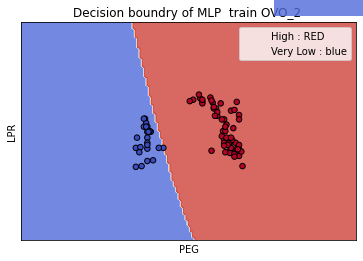

In [ ]:
#show Decision boundry of MLP  train OVO
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO_2 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_3['PEG'], x_train_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


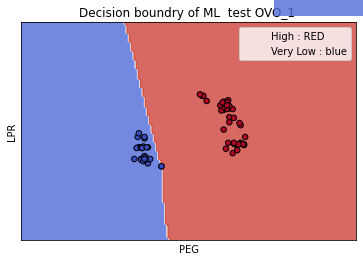

In [ ]:
#show Decision boundry of MLP test OVO
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of ML  test OVO_1 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_3['PEG'], x_test_ovo_3['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_3.fit(x_train_ovo_3, y_train_ovo_3), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_3, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['High : RED' ,'Very Low : blue'])
plt.show()

#Implement SVM classifier for OVO_4 Middle vs. low

In [ ]:
df_5 = df[((df['UNS']== 3) | (df['UNS']== 2))] 

In [ ]:
df_test_5 = df_test[((df_test[' UNS']== 3)| (df_test[' UNS']== 2))]

In [ ]:
x_train_ovo_4 = df_5[['PEG','LPR']]
y_train_ovo_4 = df_5['UNS'].map({3 : 1,  2 : 0})

In [ ]:
x_test_ovo_4 = df_test_5[['PEG','LPR']]
y_test_ovo_4 = df_test_5[' UNS'].map({3 : 1,  2 : 0})

In [ ]:
svm_ovo_4 = SVC() 
svm_ovo_4.fit(x_train_ovo_4,y_train_ovo_4)

SVC()

In [ ]:
#print classification_report for SVM model on training OVO4 dataset
print(classification_report(y_train_ovo_4,svm_ovo_4.predict(x_train_ovo_4)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        83
           1       0.99      0.95      0.97        88

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
#print classification_report for SVM model on testing OVO4 dataset
print(classification_report(y_test_ovo_4,svm_ovo_4.predict(x_test_ovo_4)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        46
           1       1.00      0.97      0.99        34

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


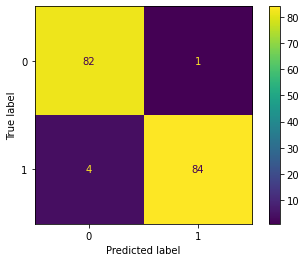

In [ ]:
#print confusion matrix for SVM model on training OVO4 dataset
plot_confusion_matrix(svm_ovo_4,x_train_ovo_4,y_train_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


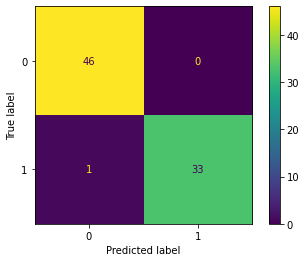

In [ ]:
#print confusion matrix for SVM model on testing OVO4 dataset
plot_confusion_matrix(svm_ovo_4,x_test_ovo_4,y_test_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


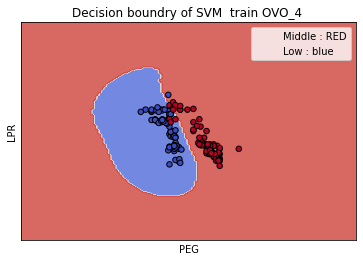

In [ ]:
#show Decision boundry of SVM  train OVO_4
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  train OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_4['PEG'], x_train_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


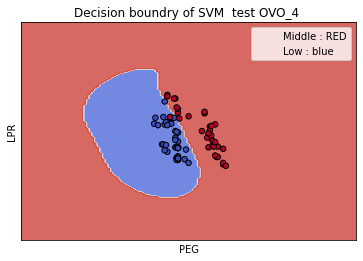

In [ ]:
#show Decision boundry of SVM  test OVO_4
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  test OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_4['PEG'], x_test_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

#Implement LR classifier for OVO_4 Middle vs. low

In [ ]:
lr_ovo_4 = LogisticRegression()
lr_ovo_4.fit(x_train_ovo_4,y_train_ovo_4)

LogisticRegression()

In [ ]:
#print classification_report for LR model on training OVO4 dataset
print(classification_report(y_train_ovo_4,lr_ovo_4.predict(x_train_ovo_4)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        83
           1       1.00      0.85      0.92        88

    accuracy                           0.92       171
   macro avg       0.93      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
#print classification_report for LR model on testing OVO4 dataset
print(classification_report(y_test_ovo_4,lr_ovo_4.predict(x_test_ovo_4)))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        46
           1       0.93      0.74      0.82        34

    accuracy                           0.86        80
   macro avg       0.88      0.85      0.85        80
weighted avg       0.87      0.86      0.86        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


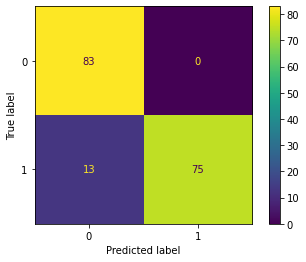

In [ ]:
#print confusion matrix for LR model on training OVO4 dataset
plot_confusion_matrix(lr_ovo_4,x_train_ovo_4,y_train_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


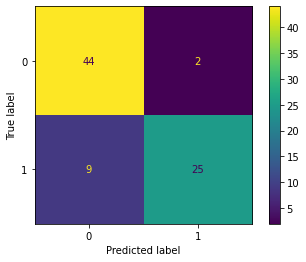

In [ ]:
#print confusion matrix for LR model on testing OVO4 dataset
plot_confusion_matrix(lr_ovo_4,x_test_ovo_4,y_test_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


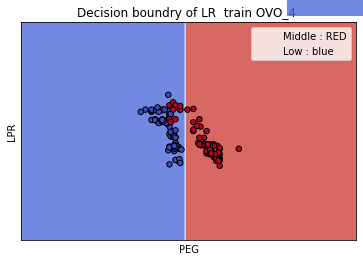

In [ ]:
#SHOW Decision boundry of LR  train OVO_4
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_4['PEG'], x_train_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


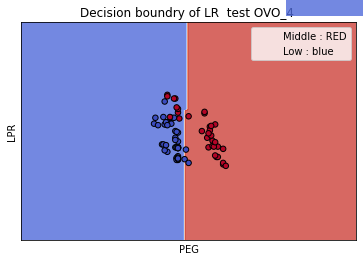

In [ ]:
#show Decision boundry of LR  test OVO_3
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  test OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_4['PEG'], x_test_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

#Implement MLP classifier for OVO_4 Middle vs. low


In [ ]:
pc_ovo_4 = MLPClassifier()
pc_ovo_4.fit(x_train_ovo_4,y_train_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print classification_report for MLP model on training OVO4 dataset
print(classification_report(y_train_ovo_4,pc_ovo_4.predict(x_train_ovo_4)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        83
           1       0.92      0.83      0.87        88

    accuracy                           0.88       171
   macro avg       0.88      0.88      0.88       171
weighted avg       0.88      0.88      0.88       171



In [ ]:
#print classification_report for MLP model on testing OVO4 dataset
print(classification_report(y_test_ovo_4,pc_ovo_4.predict(x_test_ovo_4)))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        46
           1       0.65      0.71      0.68        34

    accuracy                           0.71        80
   macro avg       0.71      0.71      0.71        80
weighted avg       0.72      0.71      0.71        80



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


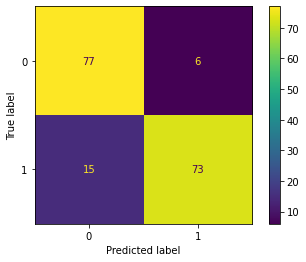

In [ ]:
#print confusion_matrix for MLP model on training OVO4 dataset
plot_confusion_matrix(pc_ovo_4,x_train_ovo_4,y_train_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


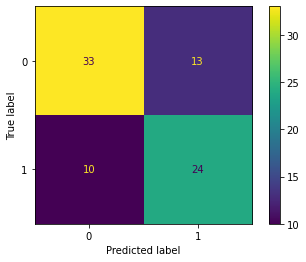

In [ ]:
#print confusion_matrix for MLP model on testing OVO4 dataset
plot_confusion_matrix(pc_ovo_4,x_test_ovo_4,y_test_ovo_4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


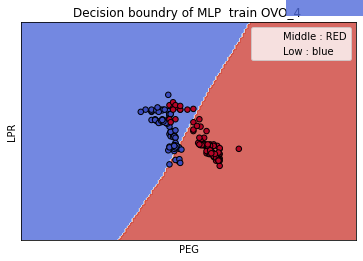

In [ ]:
#show Decision boundry of MLP  train OVO_4
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_4['PEG'], x_train_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


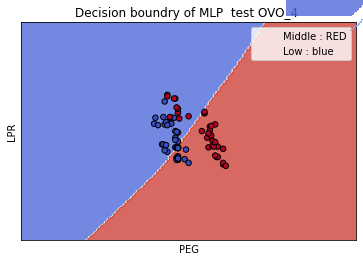

In [ ]:
#show Decision boundry of MLp  test OVO_4
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  test OVO_4 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_4['PEG'], x_test_ovo_4['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_4.fit(x_train_ovo_4, y_train_ovo_4), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_4, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Low : blue'])
plt.show()

#Implement SVM classifier for OVO_5 Middle vs. very-low


In [ ]:
df_6 = df[((df['UNS']== 3) | (df['UNS']== 1))] 

In [ ]:
df_test_6 = df_test[((df_test[' UNS']== 3)| (df_test[' UNS']== 1))]

In [ ]:
x_train_ovo_5 = df_6[['PEG','LPR']]
y_train_ovo_5 = df_6['UNS'].map({3 : 1,  1 : 0})

In [ ]:
x_test_ovo_5 = df_test_6[['PEG','LPR']]
y_test_ovo_5 = df_test_6[' UNS'].map({3 : 1,  1 : 0})

In [ ]:
svm_ovo_5 = SVC() 
svm_ovo_5.fit(x_train_ovo_5,y_train_ovo_5)

SVC()

In [ ]:
#print classification_report of SVM model for training dataset OVO5
print(classification_report(y_train_ovo_5,svm_ovo_5.predict(x_train_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        88

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [ ]:
#print classification_report of SVM model for testing dataset OVO5
print(classification_report(y_test_ovo_5,svm_ovo_5.predict(x_test_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        34

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


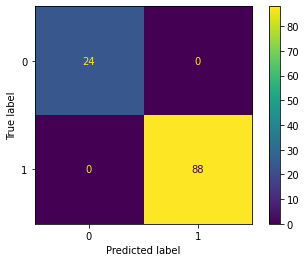

In [ ]:
#print confusion_matrix of SVM model for training dataset OVO5
plot_confusion_matrix(svm_ovo_5,x_train_ovo_5,y_train_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


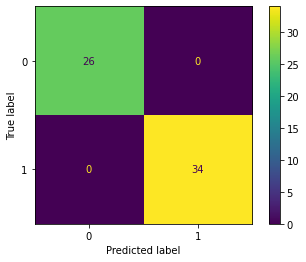

In [ ]:
#print confusion_matrix of SVM model for testing dataset OVO5
plot_confusion_matrix(svm_ovo_5,x_test_ovo_5,y_test_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


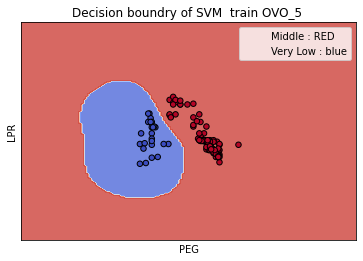

In [ ]:
#show Decision boundry of SVM  train OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  train OVO_5 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_5['PEG'], x_train_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


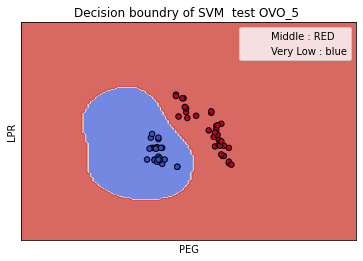

In [ ]:
#show Decision boundry of SVM  test OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  test OVO_5 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_5['PEG'], x_test_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

#Implement LR classifier for OVO_5 Middle vs. very-low

In [ ]:
lr_ovo_5 = LogisticRegression()
lr_ovo_5.fit(x_train_ovo_5,y_train_ovo_5)

LogisticRegression()

In [ ]:
#print classification_report of LR model for training dataset OVO5
print(classification_report(y_train_ovo_5,lr_ovo_5.predict(x_train_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        24
           1       0.88      1.00      0.94        88

    accuracy                           0.89       112
   macro avg       0.94      0.75      0.80       112
weighted avg       0.91      0.89      0.88       112



In [ ]:
#print classification_report of LR model for testing dataset OVO5
print(classification_report(y_test_ovo_5,lr_ovo_5.predict(x_test_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.89      1.00      0.94        34

    accuracy                           0.93        60
   macro avg       0.95      0.92      0.93        60
weighted avg       0.94      0.93      0.93        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


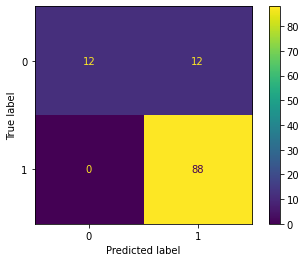

In [ ]:
#print confusion_matrix of LR model for training dataset OVO5
plot_confusion_matrix(lr_ovo_5,x_train_ovo_5,y_train_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


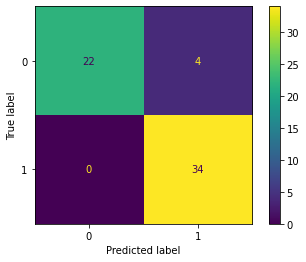

In [ ]:
#print confusion_matrix of LR model for testing dataset OVO5
plot_confusion_matrix(lr_ovo_5,x_test_ovo_5,y_test_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


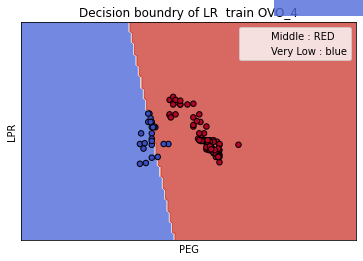

In [ ]:
#show Decision boundry of LR  train OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO_4')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_5['PEG'], x_train_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


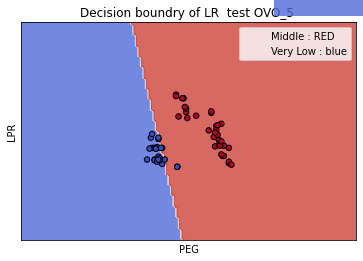

In [ ]:
#show Decision boundry of LR  test OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  test OVO_5 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_5['PEG'], x_test_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

#Implement MLP classifier for OVO_5 Middle vs. very-low

In [ ]:
pc_ovo_5 = MLPClassifier()
pc_ovo_5.fit(x_train_ovo_5,y_train_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print classification_report of MLP model for training dataset OVO5
print(classification_report(y_train_ovo_5,pc_ovo_5.predict(x_train_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29        24
           1       0.81      1.00      0.90        88

    accuracy                           0.82       112
   macro avg       0.91      0.58      0.59       112
weighted avg       0.85      0.82      0.77       112



In [ ]:
#print classification_report of MLP model for testing dataset OVO5
print(classification_report(y_test_ovo_5,pc_ovo_5.predict(x_test_ovo_5)))

              precision    recall  f1-score   support

           0       1.00      0.08      0.14        26
           1       0.59      1.00      0.74        34

    accuracy                           0.60        60
   macro avg       0.79      0.54      0.44        60
weighted avg       0.77      0.60      0.48        60



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


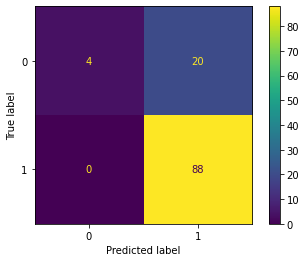

In [ ]:
#print confusion_matrix of MLP model for training dataset OVO5
plot_confusion_matrix(pc_ovo_5,x_train_ovo_5,y_train_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


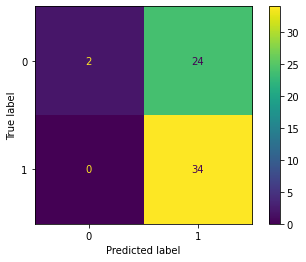

In [ ]:
#print confusion_matrix of MLP model for testing dataset OVO5
plot_confusion_matrix(pc_ovo_5,x_test_ovo_5,y_test_ovo_5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


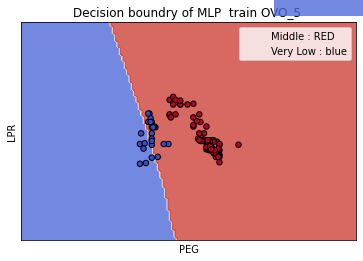

In [ ]:
#show Decision boundry of MLP  train OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO_5 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_5['PEG'], x_train_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


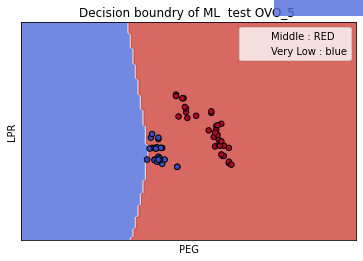

In [ ]:
#show Decision boundry of ML  test OVO_5
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of ML  test OVO_5 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_5['PEG'], x_test_ovo_5['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_5.fit(x_train_ovo_5, y_train_ovo_5), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_5, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Middle : RED' ,'Very Low : blue'])
plt.show()

#Implementing SVM model on OVO6 Low vs. very-low

In [ ]:
df_7 = df[((df['UNS']== 2) | (df['UNS']== 1))] 

In [ ]:
df_test_7 = df_test[((df_test[' UNS']== 2)| (df_test[' UNS']== 1))]

In [ ]:
x_train_ovo_6 = df_7[['PEG','LPR']]
y_train_ovo_6 = df_7['UNS'].map({2 : 1,  1 : 0})

In [ ]:
x_test_ovo_6 = df_test_7[['PEG','LPR']]
y_test_ovo_6 = df_test_7[' UNS'].map({2 : 1,  1 : 0})

In [ ]:
svm_ovo_6 = SVC() 
svm_ovo_6.fit(x_train_ovo_6,y_train_ovo_6)

SVC()

In [ ]:
#print classification report for SVM model for OVO6 training dataset
print(classification_report(y_train_ovo_6,svm_ovo_6.predict(x_train_ovo_6)))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       0.95      1.00      0.98        83

    accuracy                           0.96       107
   macro avg       0.98      0.92      0.94       107
weighted avg       0.96      0.96      0.96       107



In [ ]:
#print classification report for SVM model for OVO6 testing dataset
print(classification_report(y_test_ovo_6,svm_ovo_6.predict(x_test_ovo_6)))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.96      1.00      0.98        46

    accuracy                           0.97        72
   macro avg       0.98      0.96      0.97        72
weighted avg       0.97      0.97      0.97        72



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


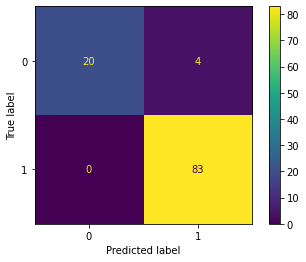

In [ ]:
#print confusion matrix for SVM model for OVO6 training dataset
plot_confusion_matrix(svm_ovo_6,x_train_ovo_6,y_train_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


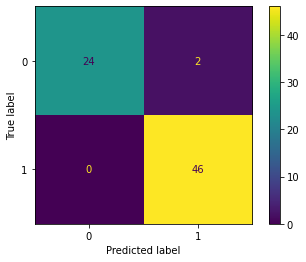

In [ ]:
#print confusion matrix for SVM model for OVO6 testing dataset
plot_confusion_matrix(svm_ovo_6,x_test_ovo_6,y_test_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


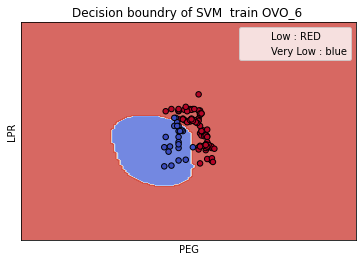

In [ ]:
#show Decision boundry of SVM  train OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  train OVO_6 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_6['PEG'], x_train_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


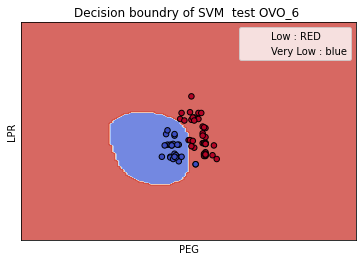

In [ ]:
#show Decision boundry of SVM  test OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of SVM  test OVO_6 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_6['PEG'], x_test_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, svm_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

#Implementing LR model on OVO6 Low vs. very-low

In [ ]:
lr_ovo_6 = LogisticRegression()
lr_ovo_6.fit(x_train_ovo_6,y_train_ovo_6)

LogisticRegression()

In [ ]:
#print classification report for LR model for OVO6 training dataset
print(classification_report(y_train_ovo_6,lr_ovo_6.predict(x_train_ovo_6)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.78      1.00      0.87        83

    accuracy                           0.78       107
   macro avg       0.39      0.50      0.44       107
weighted avg       0.60      0.78      0.68       107



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#print classification report for LR model for OVO6 training dataset
print(classification_report(y_test_ovo_6,lr_ovo_6.predict(x_test_ovo_6)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        46

    accuracy                           0.64        72
   macro avg       0.32      0.50      0.39        72
weighted avg       0.41      0.64      0.50        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


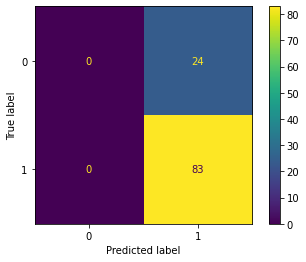

In [ ]:
#print confusion matrix for LR model for OVO6 training dataset
plot_confusion_matrix(lr_ovo_6,x_train_ovo_6,y_train_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


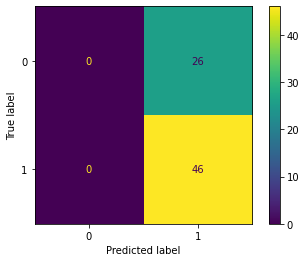

In [ ]:
#print confusion matrix for LR model for OVO6 testing dataset
plot_confusion_matrix(lr_ovo_6,x_test_ovo_6,y_test_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


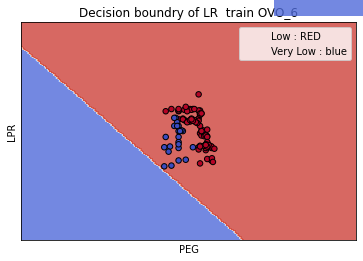

In [ ]:
#show Decision boundry of LR  train OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  train OVO_6')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_6['PEG'], x_train_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


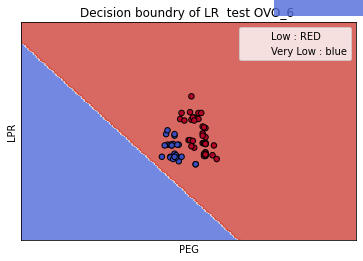

In [ ]:
#show Decision boundry of LR test OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of LR  test OVO_6 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_6['PEG'], x_test_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, lr_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

#Implementing MLP classifier of OVO6 Low vs. very-low

In [ ]:
pc_ovo_6 = MLPClassifier()
pc_ovo_6.fit(x_train_ovo_6,y_train_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [ ]:
#print classification report for MLP model for OVO6 training dataset
print(classification_report(y_train_ovo_6,pc_ovo_6.predict(x_train_ovo_6)))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08        24
           1       0.78      1.00      0.88        83

    accuracy                           0.79       107
   macro avg       0.89      0.52      0.48       107
weighted avg       0.83      0.79      0.70       107



In [ ]:
#print classification report for MLP model for OVO6 testing dataset
print(classification_report(y_test_ovo_6,pc_ovo_6.predict(x_test_ovo_6)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.64      1.00      0.78        46

    accuracy                           0.64        72
   macro avg       0.32      0.50      0.39        72
weighted avg       0.41      0.64      0.50        72



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


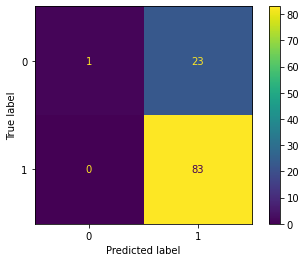

In [ ]:
#print confusion matrix for MLP model for OVO6 training dataset
plot_confusion_matrix(pc_ovo_6,x_train_ovo_6,y_train_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


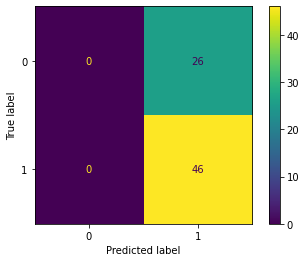

In [ ]:
#print confusion matrix for MLP model for OVO6 testing dataset
plot_confusion_matrix(pc_ovo_6,x_test_ovo_6,y_test_ovo_6)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


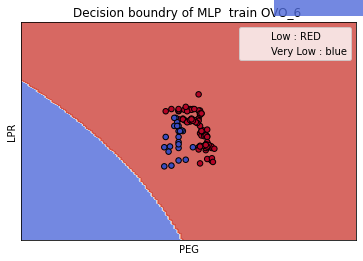

In [ ]:
#show Decision boundry of MLP  train OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of MLP  train OVO_6 ')
# Set-up grid for plotting.
X0, X1 = x_train_ovo_6['PEG'], x_train_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_train_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


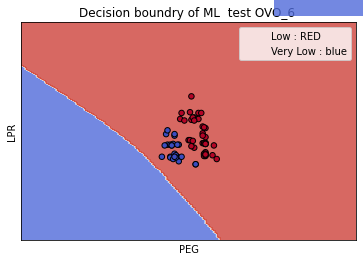

In [ ]:
#show Decision boundry of ML  test OVO_6
fig, ax = plt.subplots()
# title for the plots
title = ('Decision boundry of ML  test OVO_6 ')
# Set-up grid for plotting.
X0, X1 = x_test_ovo_6['PEG'], x_test_ovo_6['LPR']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, pc_ovo_6.fit(x_train_ovo_6, y_train_ovo_6), xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y_test_ovo_6, cmap=plt.cm.coolwarm, s=30, edgecolors='black')
ax.set_ylabel('LPR')
ax.set_xlabel('PEG')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend(labels = ['Low : RED' ,'Very Low : blue'])
plt.show()

##In OVO the accuarcy in all probabilities was very good , less accuarcy in probability-4 with class middle vs. low ,it is 85% becouse the two classes are so close to each other that in some data of two classes cannot be separated,but all accuarcy probabilities is well and the data split is well.


# arg max for SVM-OVO 

In [ ]:
def actualclass_svm(x_test):
  result=['High','High','High','Middle','Middle','Low','Very Low']
  arg_index = np.argmax([svm_ovo.predict(x_test),svm_ovo_1.predict(x_test),svm_ovo_3.predict(x_test),svm_ovo_4.predict(x_test),svm_ovo_5.predict(x_test),svm_ovo_6.predict(x_test)])
  
  return result[arg_index]

In [ ]:
#use any variables as a parameter in actualclass_svm function to sure that it work well
actualclass_svm([[0.3,0.1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

'Low'

In [ ]:
actualclass_svm([[0.4,0.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

'Middle'

In [ ]:
actualclass_svm([[0.8,0.7]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packa

'High'

In [ ]:
#the probabilites of all six probability of OVO
svm_ovo_prob_1 = SVC(probability=True) 
svm_ovo_prob_1.fit(x_train_ovo,y_train_ovo)
svm_ovo_prob_2 = SVC(probability=True) 
svm_ovo_prob_2.fit(x_train_ovo_1,y_train_ovo_1)
svm_ovo_prob_3 = SVC(probability=True) 
svm_ovo_prob_3.fit(x_train_ovo_3,y_train_ovo_3)
svm_ovo_prob_4 = SVC(probability=True) 
svm_ovo_prob_4.fit(x_train_ovo_4,y_train_ovo_4)
svm_ovo_prob_5 = SVC(probability=True) 
svm_ovo_prob_5.fit(x_train_ovo_5,y_train_ovo_5)
svm_ovo_prob_6 = SVC(probability=True) 
svm_ovo_prob_6.fit(x_train_ovo_6,y_train_ovo_6)


SVC(probability=True)

In [ ]:
#function for predicting the probabilities of OVO classes
def actualclass_prob(model_1,model_2,model_3,model_4,model_5,model_6,x_test):
  prob_1 = model_1.predict_proba(x_test) #1-h  0- m
  prob_2 = model_2.predict_proba(x_test) #1-h  0 -l
  prob_3 = model_3.predict_proba(x_test) #1-h  0-vl
  prob_4 = model_4.predict_proba(x_test) #1-m  0- l
  prob_5 = model_5.predict_proba(x_test) #1-m  0-vl
  prob_6 = model_6.predict_proba(x_test) #1-l  0-vl
  
  high = np.hstack((prob_1[:,1].reshape(-1,1),prob_2[:,1].reshape(-1,1),prob_3[:,1].reshape(-1,1)))
  middle = np.hstack((prob_1[:,0].reshape(-1,1),prob_4[:,1].reshape(-1,1),prob_5[:,1].reshape(-1,1)))
  low = np.hstack((prob_2[:,0].reshape(-1,1),prob_4[:,0].reshape(-1,1),prob_6[:,1].reshape(-1,1)))
  very_low = np.hstack((prob_3[:,0].reshape(-1,1),prob_5[:,0].reshape(-1,1),prob_6[:,0].reshape(-1,1)))
  result = [4,3,2,1]
  sum_high = np.sum(high,axis = 1).reshape(-1,1)
  sum_middle = np.sum(middle,axis = 1).reshape(-1,1)
  sum_low = np.sum(low,axis = 1).reshape(-1,1)
  sum_very_low = np.sum(very_low,axis = 1).reshape(-1,1)
  pred = np.hstack((sum_high,sum_middle,sum_low,sum_very_low))

  final = np.argmax(pred,axis= 1)
  y = []
  for i in final:
    if i==1:
      y.append(3)
    elif i ==3:
      y.append(1)
    elif i==0:
      y.append(4)
    else:
      y.append(i)
  final = np.array(y)    
  return final 
 

In [ ]:
y_pred = actualclass_prob(svm_ovo_prob_1,svm_ovo_prob_2,svm_ovo_prob_3,svm_ovo_prob_4,svm_ovo_prob_5,svm_ovo_prob_6,x_test)

In [ ]:
#the accuracy of svm-ovo model
print("the accuracy  = " ,accuracy_score(y_pred,y_test))

the accuracy  =  0.9586206896551724


In [ ]:
y_true_p_1 = y_test==y_pred

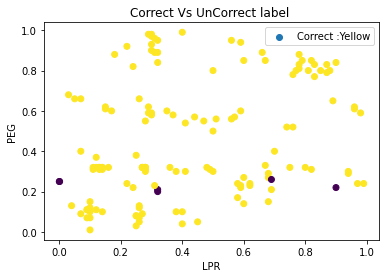

In [ ]:
#according to the higher accuracy,the model can predict the actual classes (yellow color) correctly, and another color(purple) means that it's not predicted correctly
plt.scatter(x_test['LPR'],x_test['PEG'],c = y_true_p_1 )
plt.title('Correct Vs UnCorrect label ')
plt.xlabel('LPR')
plt.ylabel('PEG')
plt.legend(labels = ['Correct :Yellow'])